In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# drop all the column with are not necessary
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
# check there is null value or not in table
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
# visualize the data
import seaborn as sns 

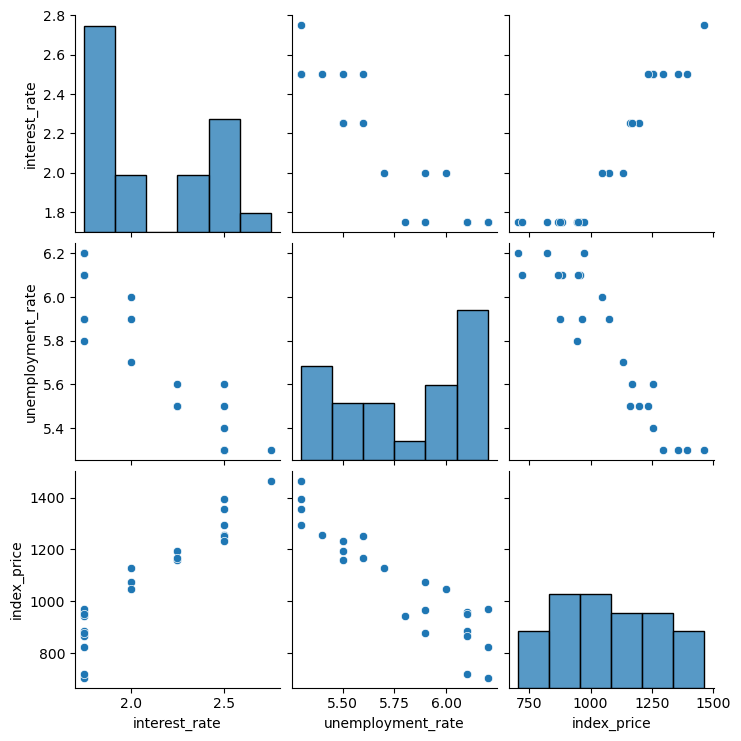

In [7]:
sns.pairplot(df)

Here we can visualize that there is a negative and positive relation between varaiable 
index_price and interest_rate has positive linear regression
index_price and unemployment_rate has negative linear regression or negative relation

In [8]:
# let's see the co-relation between varaibles 
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


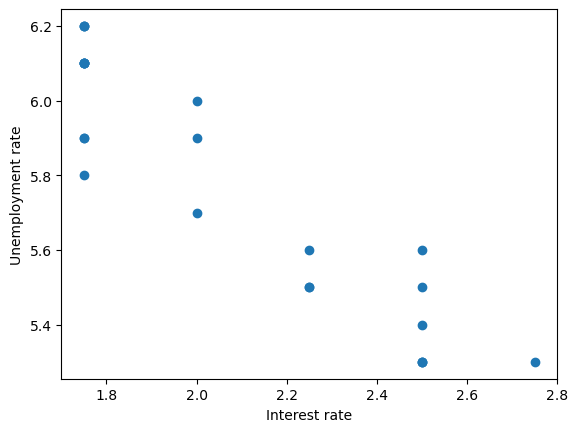

In [9]:
# let's visulaize the relationship between interest_rate and unemployment
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.ylabel('Unemployment rate')
plt.xlabel('Interest rate')
plt.show()

Here we can see that there is a negative relation between the interest rate and unemployment rate

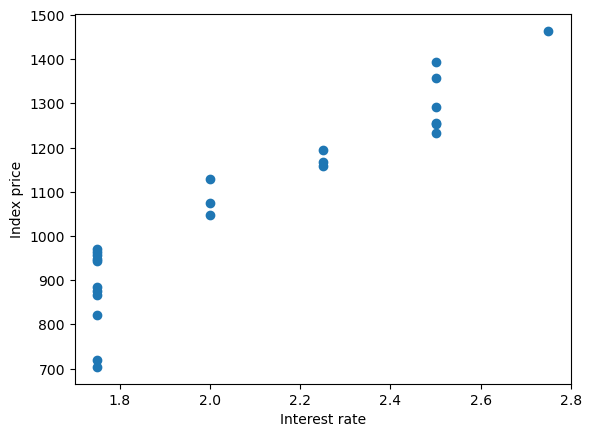

In [10]:
# also visualize the relationship between interest rate and price index
plt.scatter(df['interest_rate'],df['index_price'])
plt.xlabel('Interest rate')
plt.ylabel('Index price')
plt.show()
# here we can see there is a positive relation

In [11]:
# independent and dependent varaible 
x = df[['interest_rate','unemployment_rate']] # independent varaible
y = df['index_price'] # dependent variable

In [12]:
# let's split the train and test data 
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)

In [15]:
# Standardize
# Standardization (mean = 0, std = 1) puts all features on the same scale, making the coefficients more comparable.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train) # after the fit and transform mean will be 0 and std will be 1
x_train
# fit_transform 
# x = (x - mean)/standard deviation

array([[ 1.34275905, -1.14873305],
       [ 0.56309251, -0.82565188],
       [-0.99624059,  1.11283515],
       [-0.99624059,  1.11283515],
       [-0.21657404,  0.4666728 ],
       [ 1.34275905, -1.47181423],
       [-0.99624059,  0.4666728 ],
       [ 0.56309251, -0.82565188],
       [ 0.56309251, -0.50257071],
       [ 1.34275905, -1.47181423],
       [-0.99624059,  0.14359163],
       [-0.99624059,  1.11283515],
       [ 1.34275905, -1.47181423],
       [-0.21657404,  0.78975397],
       [-0.99624059,  1.43591632],
       [-0.99624059,  0.4666728 ],
       [-0.99624059,  1.11283515],
       [ 1.34275905, -0.50257071]])

In [18]:
# for test data 
x_test = scalar.fit_transform(x_test)
x_test

array([[-0.20851441, -0.37628835],
       [-0.83405766,  1.03479296],
       [-0.83405766,  0.75257669],
       [ 1.66811531, -1.50515339],
       [-0.83405766,  1.03479296],
       [ 1.04257207, -0.94072087]])

In [19]:
# importing the linear regression class
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
reg = regression.fit(x_train,y_train)
reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
reg.coef_
reg.intercept_
# cofficent
print(f"Cofficent:{reg.coef_}")
print(f"Intercept:{reg.intercept_}")

Cofficent:[123.24217276 -61.31367223]
Intercept:1072.9444444444443



Cross-validation is a technique used in machine learning to evaluate how well a model will perform on unseen data. Instead of just testing the model on a single split of training and test data, cross-validation splits the data multiple times to get a more reliable estimate of the model’s performance.

In [23]:
# cross validatoin
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=4)

In [24]:
validation_score

array([ -4226.75532092,  -1803.27313684,  -3267.78429952, -13736.14358242])

In [25]:
# mean of validation_score
np.mean(validation_score)

np.float64(-5758.489084923007)

In [26]:
# let's predict the data using the test data
predict = regression.predict(x_train)

In [27]:
predict

array([1308.86202965, 1192.96493729,  881.93358039,  881.93358039,
       1017.63996579, 1328.67132269,  921.55216648, 1192.96493729,
       1173.15564424, 1328.67132269,  941.36145952,  881.93358039,
       1328.67132269,  997.83067275,  862.12428734,  921.55216648,
        881.93358039, 1269.24344356])

In [28]:
new_data = pd.DataFrame({
    'interest_rate':[2.5],
    'unemployment_rate':[10]
})
# lets test the outout or price index
price_index = regression.predict(scalar.fit_transform(new_data))
print(f"The predicted price index:{price_index}")

The predicted price index:[1072.94444444]


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [30]:
y_pred = regression.predict(x_test)
# with this test data prediction

In [31]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f"Mean Squared error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"Root Mean squared error: {rmse}")

Mean Squared error: 10244.17777228503
Mean absolute error: 83.83184859882111
Root Mean squared error: 101.21352563904209


In [32]:
from sklearn.metrics import r2_score

In [33]:
score = r2_score(y_test,y_pred)
score
# The closer R² is to 1, the better your model fits the data.

0.834179140738605

## Assumtion


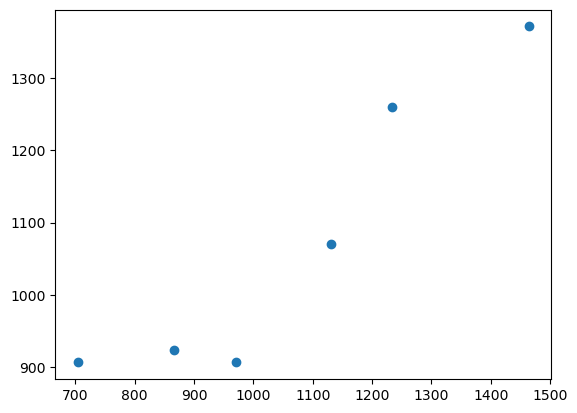

In [34]:
plt.scatter(y_test,y_pred)

In [35]:
# A residual is the difference between the actual value (observed data) and the predicted value (from the model).
residual = y_test - y_pred
residual

10     59.681705
16     64.293589
19    -58.010126
0      93.186918
22   -202.706411
6     -25.112343
Name: index_price, dtype: float64

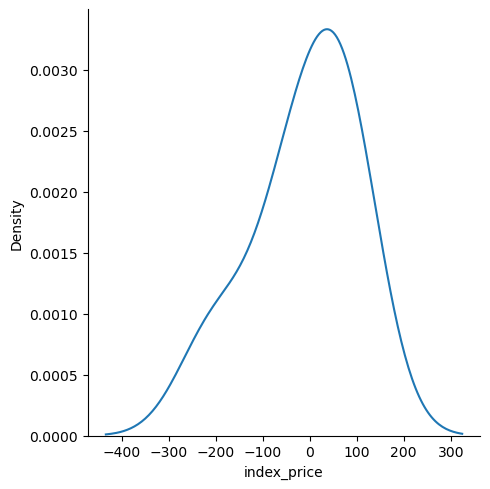

In [36]:

sns.displot(residual,kind='kde')

In [41]:
import  statsmodels.api as sm

In [50]:
model = sm.OLS(y_train,x_train).fit()

In [51]:
predict = model.predict()
predict

array([ 235.9175852 ,  120.02049284, -191.01086406, -191.01086406,
        -55.30447865,  255.72687825, -151.39227797,  120.02049284,
        100.2111998 ,  255.72687825, -131.58298492, -191.01086406,
        255.72687825,  -75.1137717 , -210.8201571 , -151.39227797,
       -191.01086406,  196.29899911])

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):             -0.094
Method:                 Least Squares   F-statistic:                             0.2277
Date:                Sat, 13 Sep 2025   Prob (F-statistic):                       0.799
Time:                        20:48:17   Log-Likelihood:                         -151.17
No. Observations:                  18   AIC:                                      306.3
Df Residuals:                      16   BIC:                                      308.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           123.2422    687.480      0.179      0.860   -1334.149    1580.634
x2           -61.3137    687.480     -0.089      0.930   -1518.705    1396.078
==============================================================================
Omnibus:                        6.909   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.081
Skew:                          -0.981   Prob(JB):                        0.130
Kurtosis:                       4.261   Cond. No.                         4.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""